Cluster labels: [ 0  0 -1 -1 -1  1  1]


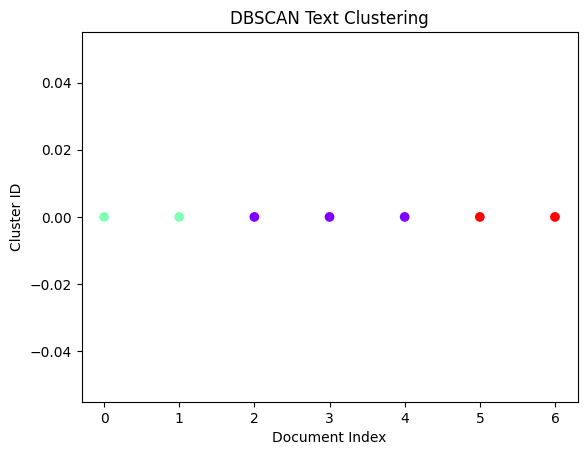


Noise points (label -1):
  Data science is an interdisciplinary field that uses scientific methods
  The rise of electric cars is changing the automotive industry
  Electric vehicles are becoming increasingly popular in the market

Cluster 0:
  Artificial intelligence is the new frontier of technology
  Machine learning is a subset of artificial intelligence

Cluster 1:
  The future of renewable energy looks promising
  Solar energy is a major part of the renewable energy sector


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# New set of sample text documents
documents = [
    "Artificial intelligence is the new frontier of technology",
    "Machine learning is a subset of artificial intelligence",
    "Data science is an interdisciplinary field that uses scientific methods",
    "The rise of electric cars is changing the automotive industry",
    "Electric vehicles are becoming increasingly popular in the market",
    "The future of renewable energy looks promising",
    "Solar energy is a major part of the renewable energy sector"
]

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents).toarray()  # Convert sparse matrix to dense array

# Step 2: Apply DBSCAN (adjusting eps and min_samples)
db = DBSCAN(eps=0.8, min_samples=2, metric='cosine')  # Adjusted eps and min_samples
labels = db.fit_predict(X)

# Output the cluster labels
print("Cluster labels:", labels)

# Visualize the clusters
plt.scatter(range(len(documents)), [0]*len(documents), c=labels, cmap='rainbow', marker='o')
plt.title("DBSCAN Text Clustering")
plt.xlabel("Document Index")
plt.ylabel("Cluster ID")
plt.show()

# Print which documents belong to which clusters
for cluster_id in np.unique(labels):
    if cluster_id == -1:
        print(f"\nNoise points (label -1):")
    else:
        print(f"\nCluster {cluster_id}:")
    cluster_docs = [documents[i] for i in range(len(documents)) if labels[i] == cluster_id]
    for doc in cluster_docs:
        print(f"  {doc}")

